In [5]:
import matplotlib.pyplot as plt
import math
import skimage
import cv2
import numpy as np
import copy
import skimage.metrics as metric
from scipy import signal
from skimage.measure import block_reduce
from os import listdir
from os.path import isfile, join
import random
print("Imports done")

Imports done


In [6]:
# random functions that are used all over the project
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

def loadImageGray(name):
    return cv2.imread(name,0)

def affichage_rows_cols_images(rows, cols, images, labels):
    rows = rows
    cols = cols
    axes = []
    fig = plt.figure(figsize=(6*rows,4*cols))
    for i in range(rows * cols):
        axes.append(fig.add_subplot(rows, cols, i + 1))
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    fig.tight_layout()
    plt.show()

def creatUniformMatrix(low, high, h, w):
    m = np.int_(np.floor(np.random.uniform(low,high,h*w)*2))
    return np.where(m == 0, -1, m)

def sampleAmount(n1,n2,d):
    return int((n1*n2)*d)
    
def takeSample(w_, n):
    done = []
    w = np.int_(np.zeros(w_.shape))
    while n > 0:
        r = np.random.randint(0, w_.shape[0])
        if r not in done:
            w[r] = w_[r]
            n = n - 1
            done.append(r)
    return w

def applayWatermakr(x,w):
    return np.clip(x + w, 0, 255)

def gaussianNoise(n, m , mu, sigma):
    return np.asarray([[np.random.normal(mu,sigma) for i in range(m)] for j in range(n)])

def MSE(X,Y):
    if X.shape == Y.shape:
        return np.sum([np.sum([(X[j,i]- Y[j,i])**2 for i in range(X.shape[1])]) for j in range(X.shape[0])]) / (X.shape[0]*X.shape[1])
    else:
        return 0

def PSNR(X,Y):
    a = 255
    mse = MSE(X,Y)
    if mse != 0:
        return 10 * np.log10(a**2/mse)
    else:
        return 0

### 1 - watermark embedding and channel modeling

In [7]:
x = loadImageGray("liftingbody.png")
height,width = x.shape
print("image height : ", height)
print("image width : ", width)
w_p = creatUniformMatrix(0, 1, height, width)
print(w_p.shape)
density = 0.5
watermarkLength = sampleAmount(height,width,density)
watermark = takeSample(w_p, watermarkLength).reshape(height, width)
print(x.shape)
print(x.shape)

image height :  512
image width :  512
(262144,)
(512, 512)
(512, 512)


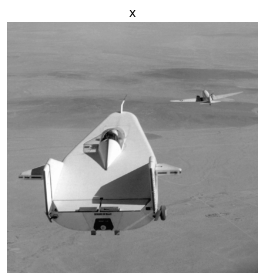

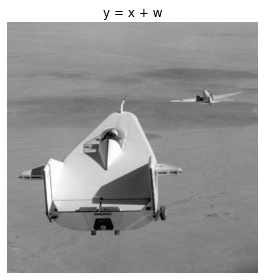

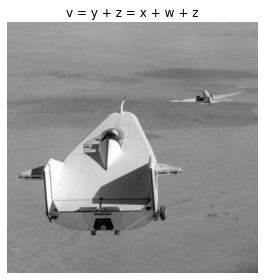

PSNR x and y  51.14163374231023
PSNR y and v  48.14395312984006
PSNR x and v  46.376943819944465


In [8]:
y = applayWatermakr(x, watermark)
z = gaussianNoise(height,width, 0,1)
v = applayWatermakr(y,z)
affichage_rows_cols_images(1, 1, [x], ["x"])
affichage_rows_cols_images(1, 1, [y], ["y = x + w"])
affichage_rows_cols_images(1, 1, [v], ["v = y + z = x + w + z"])
print("PSNR x and y ", PSNR(x,y))
print("PSNR y and v ", PSNR(y,v))
print("PSNR x and v ", PSNR(x,v))

Neither Y nor V change enough to see/notice differences between the three images

### 2 - Non-blind watermark detection

In [9]:
w_h = v-x